# **AP155 Lab Assignment** 
## Module 4: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 20, 30, and 50 points, respectively).

_Due Date_: **5PM of November 5 (Thu)**


### Student Information 

_Full Name (Last Name, First Name)_: Espalmado, Faye\
_Student No._:2018-11616\
_Section_: WFU

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Faye D. Espalmado

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/20
* Problem 2 - []/30
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


In [1]:
#importing packages for the problem
from pylab import title, show, plot, xlabel, ylabel
from numpy import arange, linspace,zeros
from cmath import exp, pi, sin               #includes complex numbers

**1.** The function `dft(y)` contains the direct translation of the equation for getting the Fourier coefficients $$c_k=\sum_{n=0}^{N-1}=y_n exp(-i\frac{2\pi kn}{N})$$

It returns a complex array `c ` for `N` real samples `y[n]` samples for all `k` in the range $0<k<N/2$.
By formulating an array of samples for the modulated sine wave  then invoking the function `dft(y)` with `y` as `mod_sine`  we get an array containing the Fourier coeffcients in `mod_sine_ft`

In [2]:
#discrete Fourier Transform function
def dft(y):
    c = zeros(N//2+1,complex)                  #complex elements
    for k in range(N//2+1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)          
    return c

#function definition and sampling
N=1000
mod_sine = []

#modulated sine wave function
def f(n):                                      
    return sin(pi*n/N)*sin(20*pi*n/N)          

#generates an array for the samples to be evaluated by the dft
for n in range(0, N, 1):                     
    mod_sine.append(f(n))                                     

mod_sine_dft = dft(mod_sine)

**2.** I plotted the Fourier Transform of the modulated sine wave. Taking the absolute value of the coefficients in the array `mod_sine_dft ` gives the amplitudes of each value

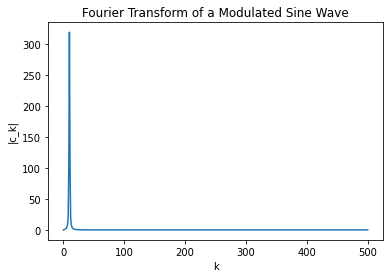

In [3]:
title("Fourier Transform of a Modulated Sine Wave")
plot(abs(mod_sine_dft))
xlabel('k')
ylabel('|c_k|')                     
show()

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

Mount the Google Drive where you saved the file $\tt dow.txt$. 

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [5]:
!ls drive/My\ Drive

 DOCUMENTS			  'S1-2021 ARTS1'     'S1-2021 PHY131'
'S1-2021 11091213 REQ TL.gsheet'  'S1 2021 BIO 11.1'  'S1-2021 PHY141'
'S1-2021 AP155'			  'S1-2021 NSTP1'     'S1-2021 REFERENCES'


Define the directory path to the location of the file $\tt dow.txt$, i.e. if it is in a folder named "AP155" under My Drive, then the file path will be "/content/drive/My Drive/AP155". Change the string variable in the code cell below, as needed:

In [6]:
file_path = "/content/drive/My Drive/S1-2021 AP155/Module 4/"

Use numpy's $\tt loadtxt$ function ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)) to load the $\tt dow.txt$ file and save the data into a numpy array named $\tt dow$.

In [7]:
from numpy import loadtxt
dow = loadtxt(file_path+"dow.txt")

Print out the first 10 elements of the array $\tt dow$. Check that you get the ff. output:
```
array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85, 12331.6 , 12309.25, 12278.41, 12307.48])
``` 

In [8]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Now you can start to write code for this problem!

In [9]:
from numpy.fft import rfft, irfft
from pylab import legend,title,plot,show

**1.** The data loaded in `dow` is plotted using `plot()`

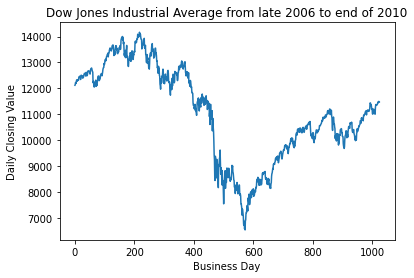

In [10]:
plot(dow)
title("Dow Jones Industrial Average from late 2006 to end of 2010")
xlabel("Business Day")
ylabel("Daily Closing Value")
show()

**2.** The `rfft` function returns the complex array of the Fourier coefficients for the `dow` data in `c`

In [11]:
c = rfft(dow)

**3.** The indexing `[int(len(c)*0.1):] ` refers to the last 90% of the array with the `len()` function giving the number of items in the array. The elements within the index is then set to zero.

In [12]:
c[int(len(c)*0.1):] = 0  

**4.** The two plots generally identical. This follows since we essentially took the Fourier transform of the orginal data, then inverted it again. However, the inverse transform was performed after setting some of the coefficients to zero, reducing the noise, which recovers a smoothed version of the plot

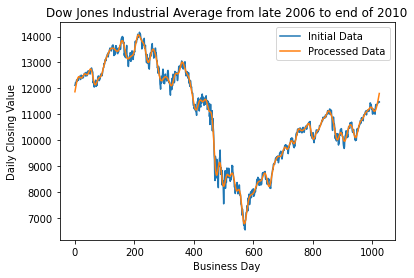

In [13]:
#calculating the inverse furier transform
dow_new = irfft(c)           #irrft() performs inverse fast fourier transforms

#plotting both original and smoothed on same plot
plot(dow, label='Initial Data')
plot(dow_new, label='Processed Data')
title("Dow Jones Industrial Average from late 2006 to end of 2010")
xlabel("Business Day")
ylabel("Daily Closing Value")
legend()
show()

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

3. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

In [14]:
from numpy import loadtxt, zeros, exp, empty
from numpy.fft import rfft2, irfft2
from pylab import imshow, show, gray

**1.** The data is loaded and read using the `loadtxt` function and plotted using `imshow`

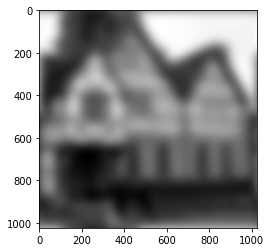

In [15]:
blur = loadtxt(file_path+"blur.txt")
imshow(blur)
gray()                                #makes a black and white image
show()

**2.** The size of the image is determined by the len() function. The point spread function array is then filled out with the gaussian points by getting the sum of the gaussians centered at the corners of the image

In [16]:
#initialization and constants
sigma = 25
x_dim, y_dim = len(blur), len(blur[0])        #gets the size of the image
psf_array = zeros((x_dim, y_dim),float)       #initialize the psf array with the same size of the image

#gaussian function
def gaussian(x,y):
    return exp(-(x**2+y**2)/(2*sigma**2))

#point spread function array
for i in range(x_dim):
    for j in range(y_dim):
        psf_array[i,j] = gaussian(i,j) + gaussian(i-x_dim,j) + gaussian(i,j-y_dim) + gaussian(i-x_dim,j-y_dim) 
#                          top left          top right             bottom left             bottom right

**3.** The created `psf_array` is plotted into a density plot using `imshow`

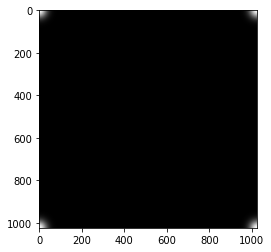

In [17]:
imshow(psf_array)
show()

**4.** Image deconvolution is performed by taking the Fourier transforms of `blur` and `psf_array` stored in `blur_fft` and `psf_fft`, respectively. `blur_fft` values greater than `epsilon` is then divided by `psf_fft`. The inverse fourier transform of resulting array `unblur_fft` is taken using the `irfft2()` function. This returns the data for the unblurred image to array `unblur`. The unblurred image is displayed using `imshow()`

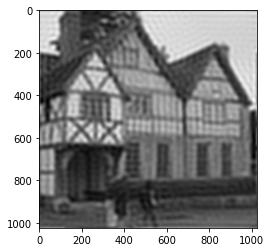

In [19]:
#fourier transforms of (1) and (2)
blur_fft = rfft2(blur)
psf_fft = rfft2(psf_array)

#divide one by the other
unblur_fft = empty([x_dim, y_dim//2+1],complex)
epsilon = 1e-3
for i in range(x_dim):
    for j in range(y_dim//2+1):
        if psf_fft[i,j] < epsilon:                   #deal with zeros or close to zeros
            unblur_fft[i,j] = blur_fft[i,j]          
        else:
            unblur_fft[i,j] = blur_fft[i,j]/psf_fft[i,j]

#perform inverse transform
unblur = irfft2(unblur_fft)

#display unblurred photo
imshow(unblur)
show()